# HW1 - Part 1
## CS-5891-01 Special Topics Deep Learning
## Ronald Picard

In this noteboook we will walk through how to perform linear regression using gradient decent. The goal for this example is to predict what the profit for a new food truck might be given the population of the city. The input data to our model will be the population of a city, and the output data of our model will be the predicted profit. Since this is a 2-D linear regression model, the classic equation of the a line (y = m * x + b) will be our model. 

To start we need import some needed classes.

In [15]:
import os
import numpy as np
import struct
from matplotlib import pyplot
import csv
import time

First, we must change our path string to the path of our data file containing the features. (Please note that you must change this string to point to the food_truck_data.txt data file on your machine.) The data file is a csv-style matrix made up of 2 feature vectors (columns). Each entry in the first feature vector is the population of the particular city, whereas each entry in the second feature vector is the profit a food truck has recieved in the particular city. Each feature vector is of the same size, and there is a one-to-one correspondence between each indexed vector entry of the first and second feature vectors in the feature matrix.

In [16]:
## path
path = 'C:/Users/computer/Desktop/git/deep-learning-jupyter-notebooks/1-linear-regression-using-gradient-descent/food_truck_data.txt'

Next, we retrieve the data from the data file as follows. This imports the feature data into a feature matrix from which we can extract each feature vector.

In [17]:
## retreive data        
data = np.genfromtxt(path, delimiter=',', dtype=np.float32)
population_vector = data[:,0]
profit_vector = data[:,1]
# print(population)
# print(profit)

Next, we will normalize each of our feature vectors to (approximately) between -1 <= x <= 1. This will reduce the bias towards the larger feature and provide a more balanced model. We do this by using the using the formula: x(i) = (x(i) - Mean(x))/Std(x). The technique is known as feature scaling. (Please note that this means if we utilize our model later on, the input data must be normalized to produce an accurate prediction.)

In [18]:
## rectrieve size
m = np.size(profit_vector)

## find the mean
population_mean = np.mean(population_vector)
profit_mean = np.mean(profit_vector)
#print('pop mean: ' + str(population_mean) + ', prof mean: ' + str(profit_mean))

## find the std
population_std = np.std(population_vector)
profit_std = np.std(profit_vector)
#print('pop std: ' + str(population_std) + ', prof std:' + str(profit_std))

## normalize the data to between -1 <= x_j <= 1 using equation x_j^i = (x_j^i - u_j)/s_j 
population_mean_vector = np.multiply(population_mean, np.ones(np.size(m)))
#print(population_mean_vector)
normalized_population_vector = np.dot(1/population_std, population_vector - population_mean_vector)
#print(normalized_population_vector)
profit_mean_vector = np.multiply(profit_mean, np.ones(np.size(m)))
#print(profit_mean_vector)
normalized_profit_vector = np.dot(1/profit_std, profit_vector - profit_mean_vector)
#print(normalized_profit_vector)

## create feature matrix
x = np.column_stack((np.ones(m), normalized_population_vector))
#print(x[:,0])
#print(x[:,1])
## re-assignment

# re-assignment
y = normalized_profit_vector
#print(y)

Now we create our 2 X 1 parameter vector with values initialized to 1. The reason that our parameter vector contains only two values is because we are trying to perform a 2-D linear regression. This means we need to find the slope and intercept values for the classic equation of a line h(x) = theta0 + theta1*x (this is analagous to our y = m * x + b equation). (Please note that the initial value of 1 was chosen pesudo-arbitrarly. We could have just as easily chosen 0.5 and recieved (nearly) the same result for a linear regression model.)

In [19]:
## create parameter vector
theta = np.array([1, 1])
#print(theta)

Now that our model is set up and preprocessing is complete we need contruct our gradient descent algrorithm. This algorithm makes use of NumPy to perform linear alebra operations in a vectorized manner. The goal of our gradient decent algorithm is to minimize our cost function; which in this case is the least means squared. Calculating cost function gradient, multiplying it by the learning rate (step size), and subtracting this from the parameter vector iteratively will eventually lead us to the minima of our cost function and thus our ideal model parameters. 

There are three primary interative steps to our gradient decsent algorithm: 

1) Calculate the value of the cost function: j = (1/(2m)) * (X * Theta - Y)' * (X * Theta - Y).

2) Calculate the value of the gradient of the cost function: dj_dTheta = (1/m) * (X' * X * Theta - X' * Y)

3) Update the theta vector: Theta = Theta - alpha * dj_dTheta

In the above steps: m = size of our feature vectors, Theta = parameter vector, Y = output profit feature vector, X = input feature matrix, j = cost function value, dj_dTheata = gradient vector with respect to the Theta vector, alpha = learning rate hyper-paramerter

These steps repeat for the specified number of iterations. The final result of the Theta vector provides the values of theta0 (intercept) and theta1 (slope) corresponding to our line equation.

While our algorithm is running we will collect the cost function values and the corresponding interation # in two arrays that will allow us to plot the cost function value as a function of the number iterations; which will allow us see a plot of the learning curve for our gradient descent algorithm. 

In [20]:
# retrieve start time
start = time.time()

## begin gradiant descent
alpha = 0.1
interations = 100
j_array = []
i_array = []
for i in range(interations):

    # calculate cost value
    hx = np.dot(x, theta) # M X 2 times 2 X 1 = M X 1 
    hx_minus_y = hx - y # M X 1 minus M X 1 = M X 1
    hx_minus_y_transpose = np.transpose(hx_minus_y) # (M X 1)^T = 1 X M
    j = np.dot(1/(2*m), np.dot(hx_minus_y_transpose, hx_minus_y)) # scalar * 1 X M times M X 1 = scalar
    j_array.append(j)
    i_array.append(i)

    # calculate gradient vector
    x_transpose_x = np.dot(np.transpose(x), x) # 2 X M times M X 2 = 2 X 2
    x_transpose_x_theta = np.dot(x_transpose_x, theta) # scalar * 2 X 1 = 2 X 1 
    x_transpose_y = np.dot(np.transpose(x), y) # 2 X M times M X 1 = 2 X 1
    dj_dtheta = np.dot(1/m, x_transpose_x_theta - x_transpose_y) # 2 X 1 minus 2 X 1 = 2 X 1

    # update theta vector
    theta = theta - np.dot(alpha, dj_dtheta) # 2 X 1 - scalar * 2 X 1 = 2 X 1

# retrieve end time
end = time.time()

# logger data
print('elapsed time: ' + str(end-start) + ' ms')
print('final cost function value: ' + str(j))
print('interations: ' + str(interations))
print('Normalized Parameters: theta0: ' + str(theta[0]) + ', theta1: ' + str(theta[1]))

elapsed time: 0.0019948482513427734 ms
final cost function value: 0.49029398087552617
interations: 100
Normalized Parameters: theta0: 2.6499769928728125e-05, theta1: -0.13929690232082123


As printed above, the parameters after 100 iterations came out to (approximatly) the following as shown above:

1) theta0 = 2.6461507394829433e-05

2) theta1 = 0.8378775736547807

Therefore, our normalized 2-D line equation becomes: 

Price = 2.6461507394829433e-05 + 0.8378775736547807 * Population 

Finally we will plot the results. 

1) The first plot is the normalized line solution of the gradient decent algorithm. 

2) The second plot is denormalized line solution of the gradient decent algorithm. 

3) The third plot is the learning curve that relates the cost function value to the number of iterations of the algorithm. As seen by this plot, the cost function converges rapidly in about 20 iterations at a 0.1 leraning rate. 

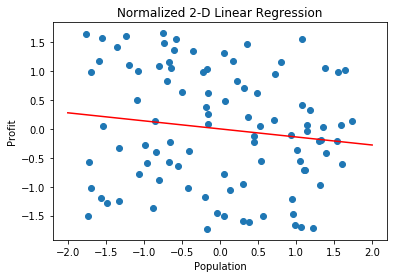

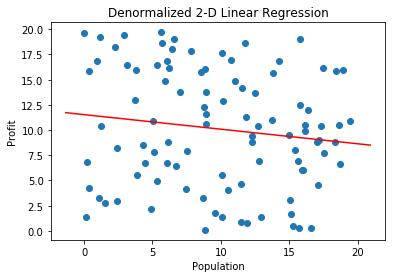

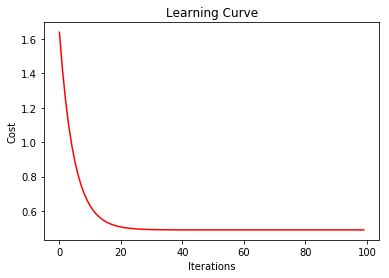

In [21]:
# plot the results

pyplot.figure()
pyplot.scatter(normalized_population_vector, normalized_profit_vector) 
normalized_xmin = -2
normalized_xmax = 2
normalized_h_x_min = theta[0] + np.multiply(theta[1], normalized_xmin)
normalized_h_x_max = theta[0] + np.multiply(theta[1], normalized_xmax)
pyplot.plot([normalized_xmin, normalized_xmax], [normalized_h_x_min, normalized_h_x_max], 'red')
pyplot.title('Normalized 2-D Linear Regression')
pyplot.xlabel('Population')
pyplot.ylabel('Profit')
pyplot.show()

pyplot.figure()
pyplot.scatter(population_vector, profit_vector) 
xmin = np.dot(normalized_xmin, population_std) + population_mean
xmax = np.dot(normalized_xmax, population_std) + population_mean
h_x_min = np.dot(normalized_h_x_min, profit_std) + profit_mean
h_x_max = np.dot(normalized_h_x_max, profit_std) + profit_mean
pyplot.plot([xmin, xmax], [h_x_min, h_x_max], 'red')
pyplot.title('Denormalized 2-D Linear Regression')
pyplot.xlabel('Population')
pyplot.ylabel('Profit')
pyplot.show()

# plot learning curve
pyplot.figure()
pyplot.plot(i_array, j_array, 'red')
pyplot.title('Learning Curve')
pyplot.xlabel('Iterations')
pyplot.ylabel('Cost')
pyplot.show()

This concludes part 1.